### 1. Data Gathering and Setup

#### 1.1 Installing and Importing Dependencies

In [2]:
# installing the libraries required for the Image CLassification
!pip install pandas numpy matplotlib seaborn plotly
!pip install tensorflow tensorflow-gpu opencv-python

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\chatu\AppData\Local\Temp\pip-install-p_9d9q9v\tensorflow-gpu_8b3e82eaf9a84f2fa86fb92d055eb8a2\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-exited-with-error
  
  Running setup.py install for tensorflow-gpu did not


  Using cached tensorflow-2.11.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached opencv_python-4.7.0.68-cp37-abi3-win_amd64.whl (38.2 MB)
  Using cached tensorflow_intel-2.11.0-cp39-cp39-win_amd64.whl (266.3 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorboard-2.11.2-py3-none-any.whl (6.0 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached grpcio-1.51.1-cp39-cp39-win_amd64.whl (3.7 MB)
  Using cached protobuf-3.19.6-cp39-cp39-win_amd64.whl (895 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached tensorflow_estimator-2.11.0-py2.py3-none-any.whl (439 kB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached keras-2.11.0-py2.py3-none-any.whl (1.7 MB)
  Using cached tensorboard_data

In [3]:
# validating to ensure right dependecies have been installed.
!pip list

Package                       Version
----------------------------- --------------------
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binaryornot                   0.4.4
bitarray                      2.5.1
bkcharts                      0.2
blac

In [4]:
# checking the current Python version
from platform import python_version
print(python_version())

3.9.13


In [5]:
# to ignore the warnings and import the required libraries for the project
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os # to interact with os and  navigate through the file system
%matplotlib inline

In [6]:
os.getcwd()

'C:\\Users\\chatu\\Dropbox\\Ineuron Data Science and ML Course\\Deep Learning\\Image Classification'

In [7]:
os.path.join('data','happy')

'data\\happy'

In [8]:
gpus=tf.config.experimental.list_physical_devices('GPU')# to get the list of CUDA-enabled GPUs installed on your machine
len(gpus)

0

#### 1.2 Remove Dodgy Images:
After bulk downloading images manually for model training,we need to check and remove those images which are corrupt or bear incorrect extension. This step could be a considered a part of feature engineering where the data needs to be cleaned.

In [9]:
import cv2
import imghdr #to check the file extensions

In [10]:
data_dir='data' 
image_exts=['jpeg','jpg','bmp','png']
# a list of valid extensions.

In [11]:
# looping through the folders and subfolders to check invalid image and extension and get rid of them.
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path=os.path.join(data_dir,image_class,image)
        try:
            img=cv2.imread(image_path) # reads an image as an array.
            tip=imghdr.what(image_path)# reads the extension of the file.
            if tip not in image_exts:
                os.remove(image_path)
        except Exception as e:
            print('Issue with an image {}'.format(image_path))
            
            
    

(880, 1400, 3)


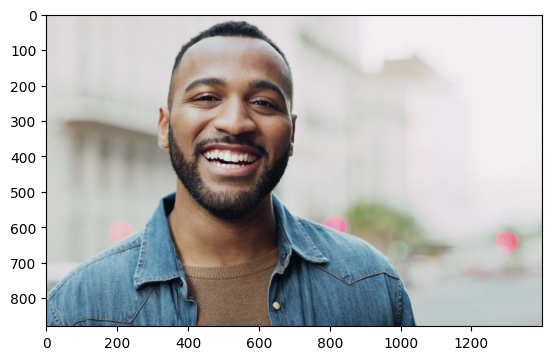

In [12]:
# testing and printing one of the images
img=cv2.imread('data/happy/05-12-21-happy-people.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)) # this is to conver GRB into the RGB format
print(img.shape)
#PS: opencv reads the image in BGR and matplotlib expects it to be RGB. Therefore, the conversion from BGR to RGB is required.

### 1.3 Loading the data

In [13]:
data=tf.keras.utils.image_dataset_from_directory('data')


Found 171 files belonging to 2 classes.


The above method creates a pipeline which includes reading data from source, applying transformation and iterate over all the elements one by one. this builds the image dataset on the fly where you don't have to create labels or classes or do one hot encoding to transform the images.
it doesn't hold the data into the memory. it returns tf.data.Dataset object.

PS: for keras utils to classify the data, a particular directory structured must be followed.

In [14]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [15]:
type(data)


tensorflow.python.data.ops.dataset_ops.BatchDataset

In [16]:
data_iterator=data.as_numpy_iterator() # converting it into a numpy iterator

In [17]:
# run the below to get a new batch of 32 images
batch=data_iterator.next()

In [18]:
batch[1]

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1])

In [19]:
#Shape of the image
batch[0].shape

(32, 256, 256, 3)

In [20]:
#grabbing 4 images from the batch of 32 images
batch[0][:4].shape

(4, 256, 256, 3)

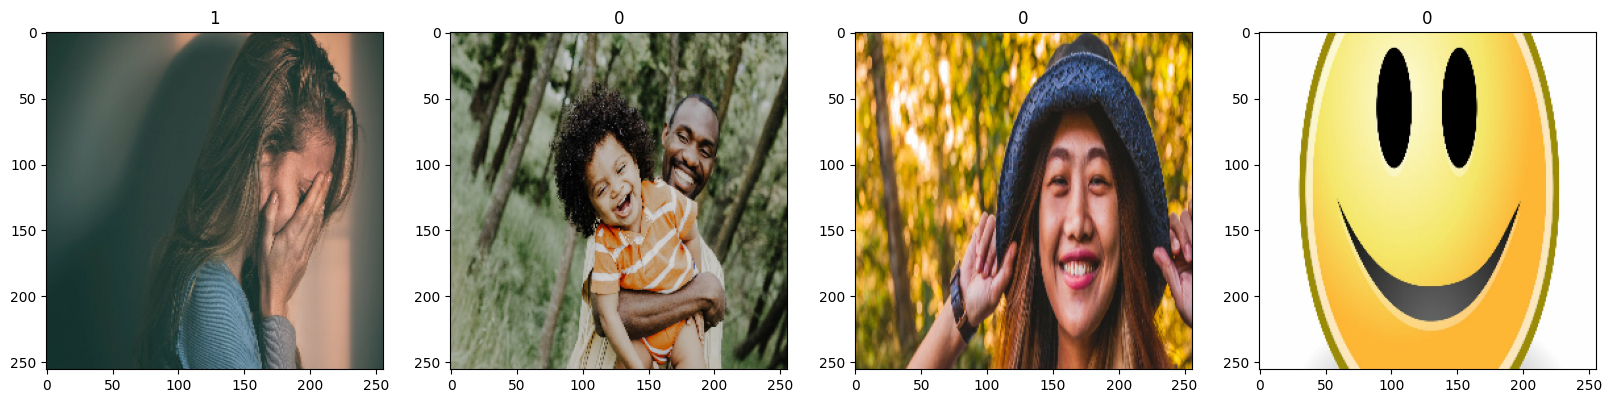

In [21]:
#plotting the classes
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


In [22]:
# so here as shown 
#class 1: SAD people
#class 0: HAPPY people

In [23]:
print(batch[0].min())
print(batch[0].max())
# the value of the images varies between 0 and 255.

0.0
255.0


### 2. Feature Scaling and Train-Test Split:
This steps including feature scaling and train test split
1) Feature Scaling: Here we will perform normalization which would scale down values from 0-255 to 0-1. this helps the gradient descent reaches the convergence point faster. Normalization can be achieved with the help of min max scaler or simply using the map function.  we are going to do it as we load the data into the data pipeline using the data pipeline capability. refer the below to see different transformations methods in the data pipeline.
https://www.tensorflow.org/api_docs/python/tf/data/Dataset#as_numpy_iterator

2) Train-Test Split: Training data set is used for training the model and test data set is for testing/evaluating the model.

In [24]:
#Feature Scaling:
# x=images and y=labels
data=data.map(lambda x,y:(x/255,y))

In [25]:
#converting it into a numpy iterator
scaled_iterator=data.as_numpy_iterator()

In [26]:
# creating a batch of 32 images
batch=scaled_iterator.next()

In [121]:
# checking the scaled values
print(batch[0].min())
print(batch[0].max())
print(len(data))

0.0
1.0
6


In [28]:
#Splitting the data set into train, test and validation set
train_size=int(len(data)*.7) 
val_size=int(len(data)*.2)
test_size=int(len(data)*.1)+1

Training dataset: to train the deep learning model

Validation dataset: to tune the model while training is being done

Test dataset: to evaluate the performance of the model

In [29]:
print(train_size) # that is 70% of the data meaning 4 batches with 32 images in it
print(val_size)
print(test_size)

4
1
1


In [30]:
# creating a train, validation and test dataset
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

### 3: Deep Learning Model


#### 3.1 Building a Deep Learning Model:
we are going to build a CNN model using keras.sequential API.
this allows us to create a block of Neural Networks where we can add different layers like Input layers, hidden layers and output layers.

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

Pooling layer: it is used to reduce spatial dimension while preserving the most important information as it returns the highest value present in local regions.

Dense: it is used to add layers and neurons

Flatten: after performing filtering, padding and pooling, we flatten the data to pass it throught the neural networks.

Dropout: that is used to prevent overfitting by dropping out certain number of neurons in each training iteration.

In [32]:
# Initializing the model
model=Sequential()

Important concepts in CNN:
here mainly we are applying three layers:

1) Convolutional Layer: this layers comprises of different operations like padding, filtering and Maxpooling to extract the most important feature out of the images and condensing them.

    a) Adding a convolutional layer with 16 filters of size (3,3) and stride 1 and then
    applying the relu activation function to capture non linear realtionships.
    
    b) input size is going to be 256*256 with 3 channels for RGB.

2) Flattening Layer: That is to flatten the output we get out of the convolutional layer so that can be passed to ANN as an input

3) Dense Layer: that is construct an ANN to get the binary output

In [33]:
model.add(Conv2D(16,(3,3),1,activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D()) # it extracts the maximum number/most important feature out of the image

model.add(Conv2D(32,(3,3),1,activation='relu')) # adding another Convolutional Block
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu')) # adding another Convolutional Block
model.add(MaxPooling2D())

model.add(Flatten()) # Flattening the values got by the last Convolutional Block to pass it to ANN

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [46]:
model.compile('adam',loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

#### 3.2 Training the Model: 
we are going to train the deep learning model with our dataset using fit method.

In [54]:
logdir='logs'

In [55]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1)
early_stopping=tf.keras.callbacks.EarlyStopping()

#### 
Here we are using two callbacks. callbacks are used to do a certaint task at a certain point during the training process. Tensorboard callback is used to create logs and visualise the performance of the training process through histogram.

Earlystopping is used to prevent overfitting as it stops the training process when the accuracy of the validation set starts to go down.

In [238]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback,early_stopping])

Epoch 1/20
4/4 [==============================] - 7s 2s/step - loss: 6.5507e-05 - accuracy: 1.0000 - val_loss: 6.9957e-05 - val_accuracy: 1.0000
Epoch 2/20
4/4 [==============================] - 7s 2s/step - loss: 6.6609e-05 - accuracy: 1.0000 - val_loss: 4.5056e-05 - val_accuracy: 1.0000


In [239]:
hist.history

{'loss': [6.550747639266774e-05, 6.660855433437973e-05],
 'accuracy': [1.0, 1.0],
 'val_loss': [6.995670992182568e-05, 4.505630931816995e-05],
 'val_accuracy': [1.0, 1.0]}

#### 3.3 Plot Performance:
Plotting the performance of the model using Matplotlib library.

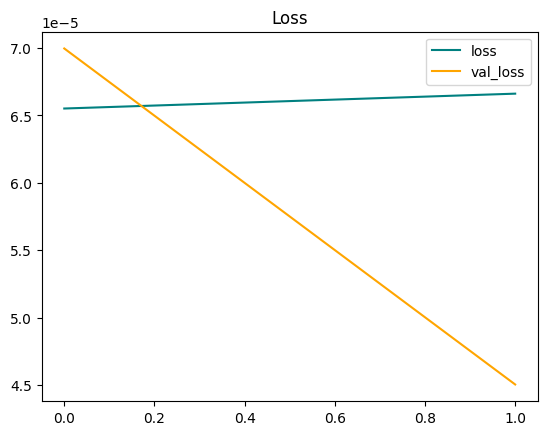

In [240]:
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
plt.title('Loss')
plt.legend(loc='upper right')
plt.show()

### 4. Model Evaluation:
Differnet metrics like confusion metric, recall, precision, accuracy can be used to assess the model's performance on the test data.

#### 4.1 Evaluation

In [241]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
import tensorflow as tf

In [242]:
# Initializing instances
precision=Precision()
recall=Recall()
accuracy=BinaryAccuracy()

In [243]:
len(test)

1

In [244]:
for batch in test.as_numpy_iterator():
    X,y=batch
    y_pred=model.predict(X) 
    precision.update_state(y,y_pred)
    recall.update_state(y,y_pred)
    accuracy.update_state(y,y_pred)
    cm=tf.math.confusion_matrix(y,y_pred)
    

1/1 [==============================] - 0s 102ms/step


In [245]:
print(f'Precision={precision.result()},\n recall={recall.result()},\n accuracy={accuracy.result()}')

Precision=1.0,
 recall=1.0,
 accuracy=1.0


In [246]:
# confusion matrix
print(cm)

tf.Tensor(
[[6 0]
 [4 1]], shape=(2, 2), dtype=int32)


#### 4.2 Test

In [247]:
import cv2

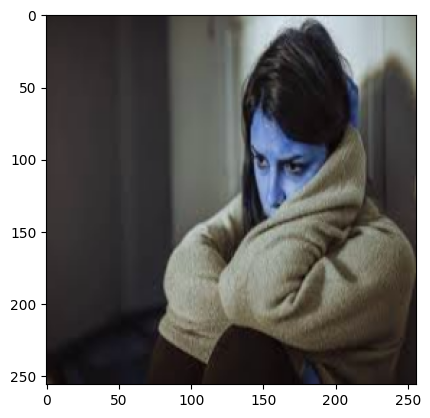

In [248]:
# going to read an image that  has never seen by the model to test it out
# the image needs to be resized before it passes through the neural network
img1=cv2.imread('Sadperson_Test.jpeg')
resized_img1=tf.image.resize(img1,(256,256))
plt.imshow(resized_img1.numpy().astype(int))
plt.show()


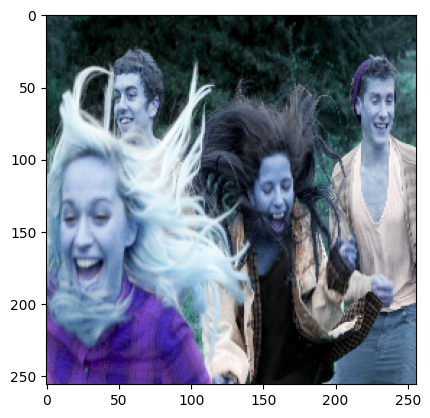

In [256]:
img2=cv2.imread('154006829.jpg')
resized_img2=tf.image.resize(img2,(256,256))
plt.imshow(resized_img2.numpy().astype(int))
plt.show()

#PS: the cv2.imread returns the image in the GRB format instead of RGB format


#### 
Neural Network expects to get a batch of images not a single image so we need to add one more dimension to the single image to convert it into a batch format and perform normalization before it passes through the neural network.

In [259]:
# Scaling down the pixel and converting a single image into a batch by adding one more dimension
y_predict1=model.predict(np.expand_dims(resized_img1/255,0))
# setting the threshold value 0.5
if y_predict1>=0.5:
    print('Predicted class is sad')
else:
    print('Predicted class is happy')

1/1 [==============================] - 0s 64ms/step
Predicted class is sad


In [261]:
y_predict2=model.predict(np.expand_dims(resized_img2/255,0))
# setting the threshold value 0.5
if y_predict2>=0.5:
    print('Predicted class is sad')
else:
    print('Predicted class is happy')

1/1 [==============================] - 0s 77ms/step
Predicted class is happy


#### 5. Save the model
we have to serialise the model by converting it into either a pickle file or a H5 file so the model can be used by any other application. This serialised model can be deployed as an API. However, tensorflow based deep learning model should preferrably be serialised using H5.

In [266]:
from tensorflow.keras.models import load_model

In [268]:
model.save(os.path.join('models','ImageSentimentModel.h5')) # serializing the model

In [269]:
# loading the model
loaded_model=load_model(os.path.join('models','ImageSentimentModel.h5'))

In [274]:
# passing an image to test the model.
# Here image file needs to be resized and normalised
y_pred=loaded_model.predict(np.expand_dims(resized_img2/255,0))
if y_pred>=0.5:
    print('Sad')
else:
    print('Happy')

1/1 [==============================] - 0s 81ms/step
Happy
